## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
import pandas as pd

### **나.  학습데이터 불러오기**

In [2]:
df = pd.read_csv('train.csv')
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [3]:
df['url_ip_present'].value_counts()

0.0    3441
1.0     223
Name: url_ip_present, dtype: int64

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [63]:
df.describe()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label_binary
count,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000
mean,54.559225,0.412937,29.363401,20.381550,2.516921,0.272653,4.707697,0.060862,4.228568,0.002183,0.220797,8.785480,0.018013,0.028930,70.843886,0.998090,1.016648,1.028930,66.182860,0.492904
std,82.493265,0.847058,78.584655,9.596281,1.534119,1.124592,25.318285,0.239110,0.393055,0.046682,0.898383,12.647356,0.144808,0.237682,365.593304,0.144974,0.225330,1.563903,342.651459,0.500018
min,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.737839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,14.000000,2.000000,0.000000,0.000000,0.000000,3.983196,0.000000,0.000000,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.000000
50%,36.000000,0.000000,13.000000,17.000000,2.000000,0.000000,0.000000,0.000000,4.189561,0.000000,0.000000,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000,0.000000
75%,55.000000,1.000000,31.000000,24.000000,3.000000,0.000000,0.000000,0.000000,4.458940,0.000000,0.000000,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000,1.000000
max,1837.000000,14.000000,1816.000000,109.000000,32.000000,18.000000,429.000000,1.000000,5.821782,1.000000,26.000000,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 숫자형 변수
n_columns = ['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len', \
             'url_hostname_len', 'url_num_dots', 'url_num_underscores', 'url_query_len', \
             'url_num_query_para', 'url_entropy',\
             "html_num_tags('iframe')", "html_num_tags('script')", "html_num_tags('embed')", \
             "html_num_tags('object')", "html_num_tags('div')", "html_num_tags('head')", \
             "html_num_tags('body')", "html_num_tags('form')", "html_num_tags('a')", \
             "html_num_tags('applet')"]
# 범주형 변수
c_columns = ['url_ip_present', 'url_chinese_present', 'url_port', "label"]

C:\Users\User\AppData\Local\Temp\ipykernel_14824\1581010609.py:6: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


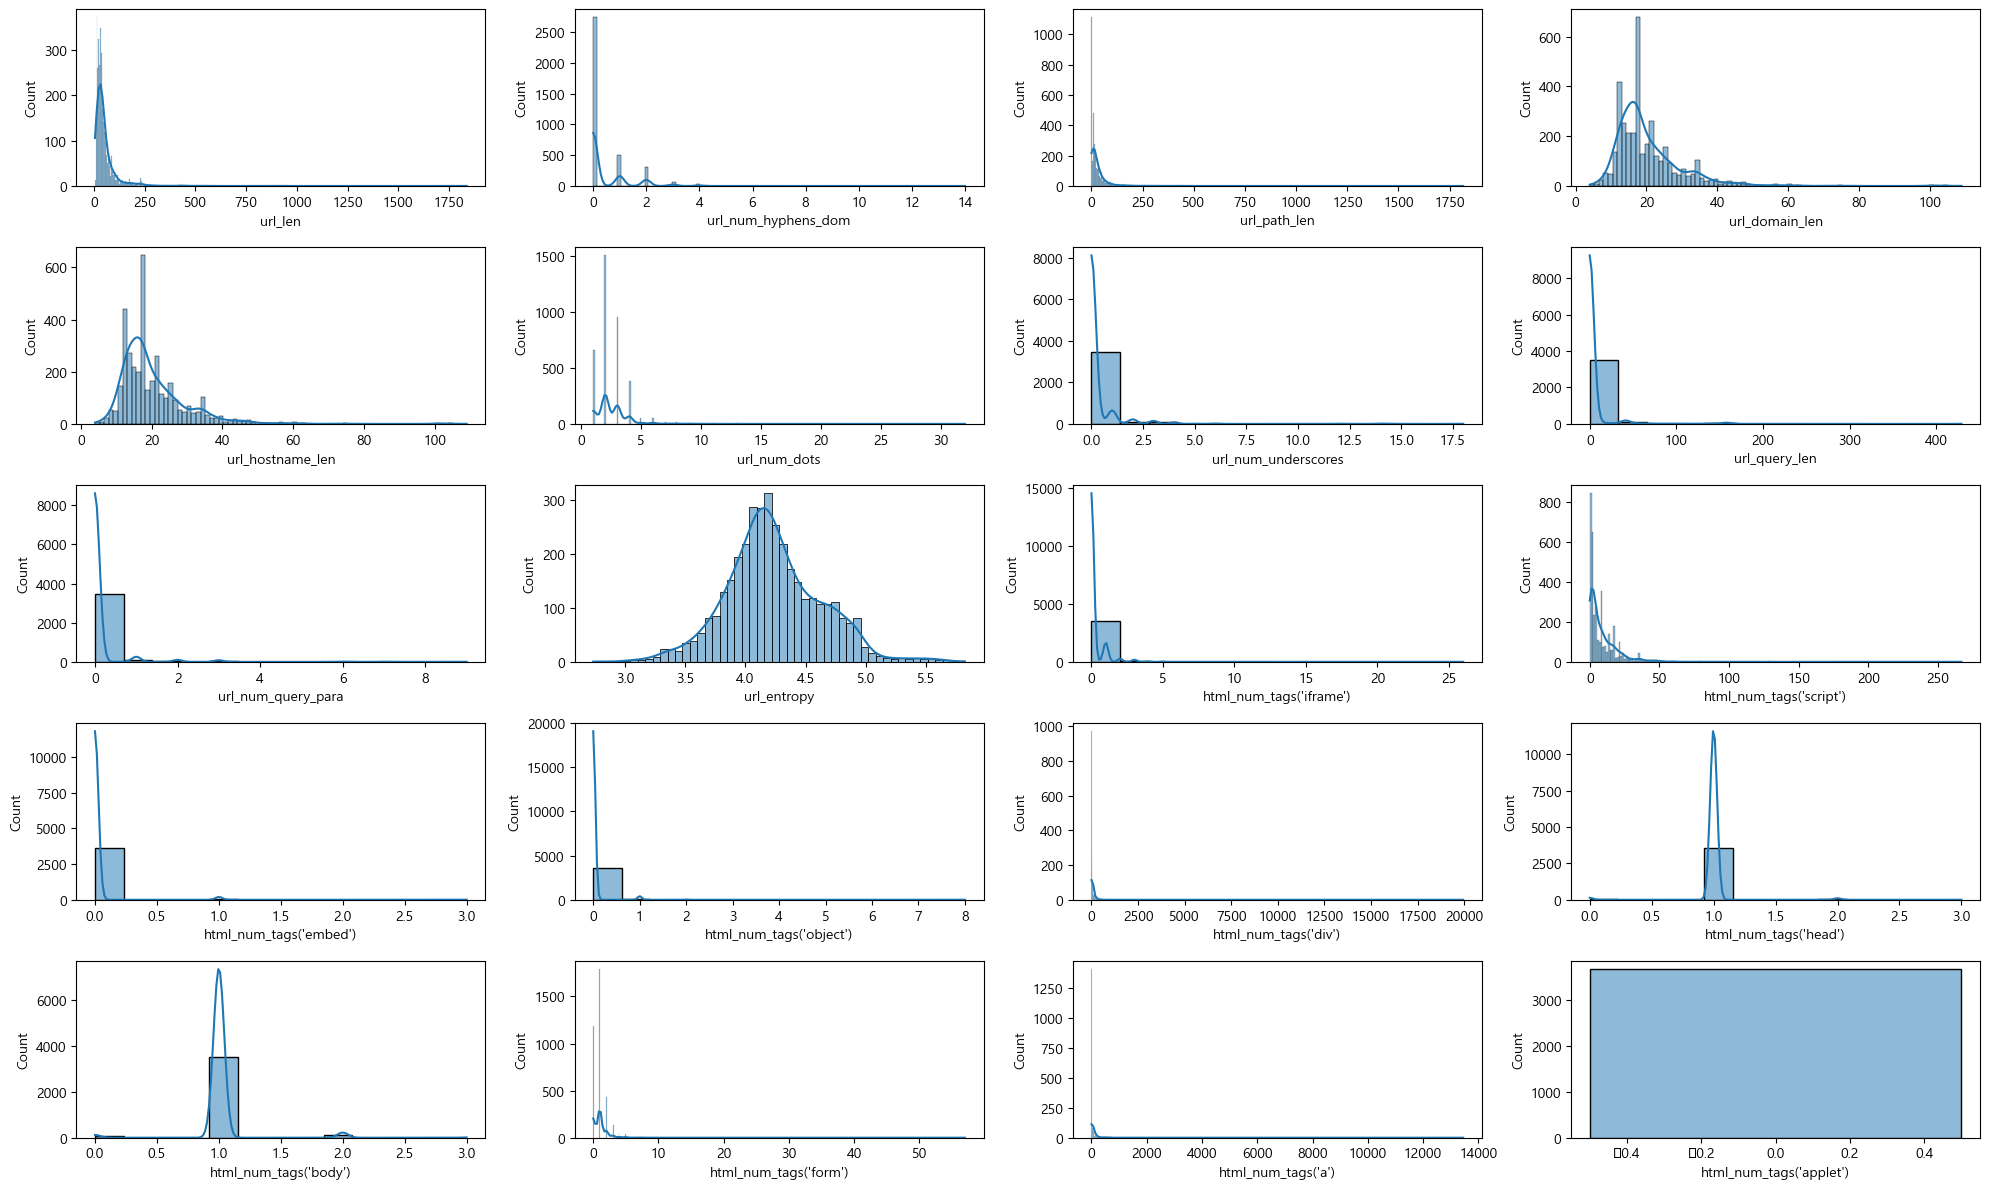

In [8]:
# 단변량 분석 : 숫자형 변수
plt.figure(figsize=(20, 12))
for i in range(0, len(n_columns)):
    plt.subplot(5, 4, i + 1)
    sns.histplot(x=n_columns[i], data=df, kde=True)
    plt.tight_layout()

plt.show()

In [9]:
df["html_num_tags('applet')"].value_counts()

0.0    3664
Name: html_num_tags('applet'), dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


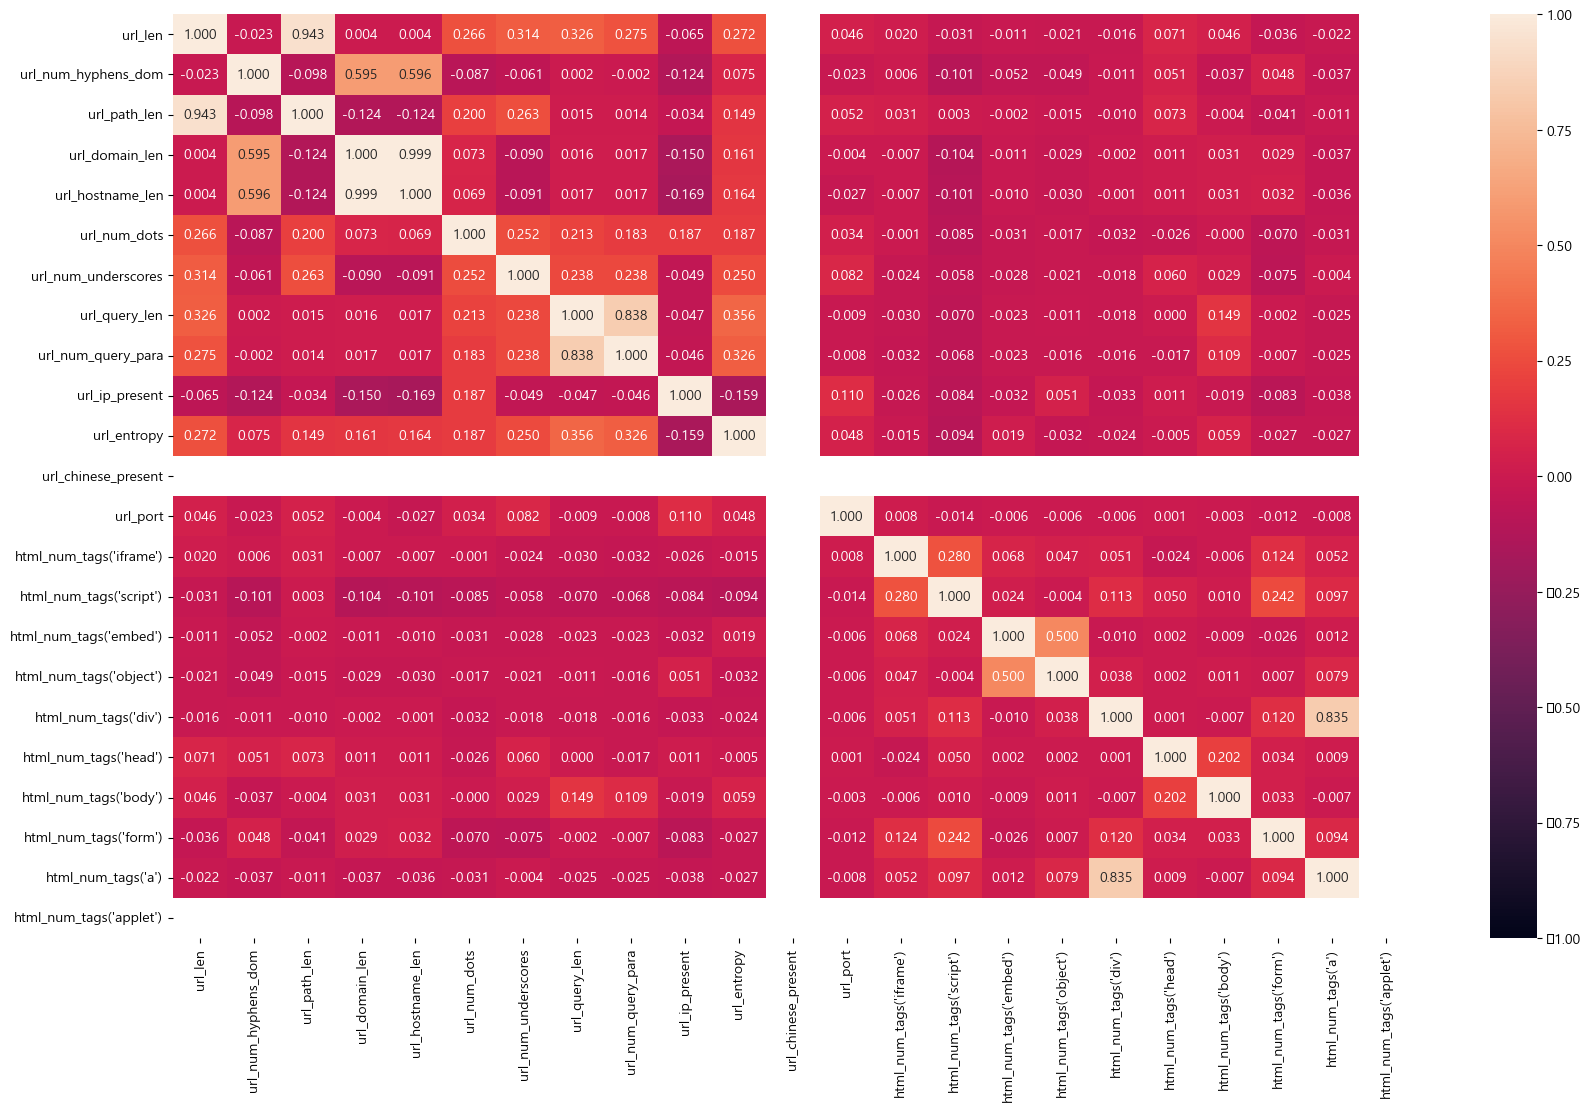

In [10]:
# 상관계수
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),
           annot=True,
           fmt='.3f',
           vmin=-1, vmax=1)
plt.show()

In [20]:
# 단변량 분석 : 범주형 변수
for i in range(0, len(c_columns)):
    print(f'[[[ {c_columns[i]} ]]]')
    print(df[c_columns[i]].value_counts())
    print()
    print(df[c_columns[i]].value_counts()/df.shape[0])
    print('-'*30)

[[[ url_ip_present ]]]
0.0    3441
1.0     223
Name: url_ip_present, dtype: int64

0.0    0.939138
1.0    0.060862
Name: url_ip_present, dtype: float64
------------------------------
[[[ url_chinese_present ]]]
0.0    3664
Name: url_chinese_present, dtype: int64

0.0    1.0
Name: url_chinese_present, dtype: float64
------------------------------
[[[ url_port ]]]
0.0    3656
1.0       8
Name: url_port, dtype: int64

0.0    0.997817
1.0    0.002183
Name: url_port, dtype: float64
------------------------------
[[[ label ]]]
benign       1858
malicious    1806
Name: label, dtype: int64

benign       0.507096
malicious    0.492904
Name: label, dtype: float64
------------------------------


## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [34]:
df['malicious'] = df['label'].map({'malicious':1, 'benign':0})

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


LinAlgError: singular matrix

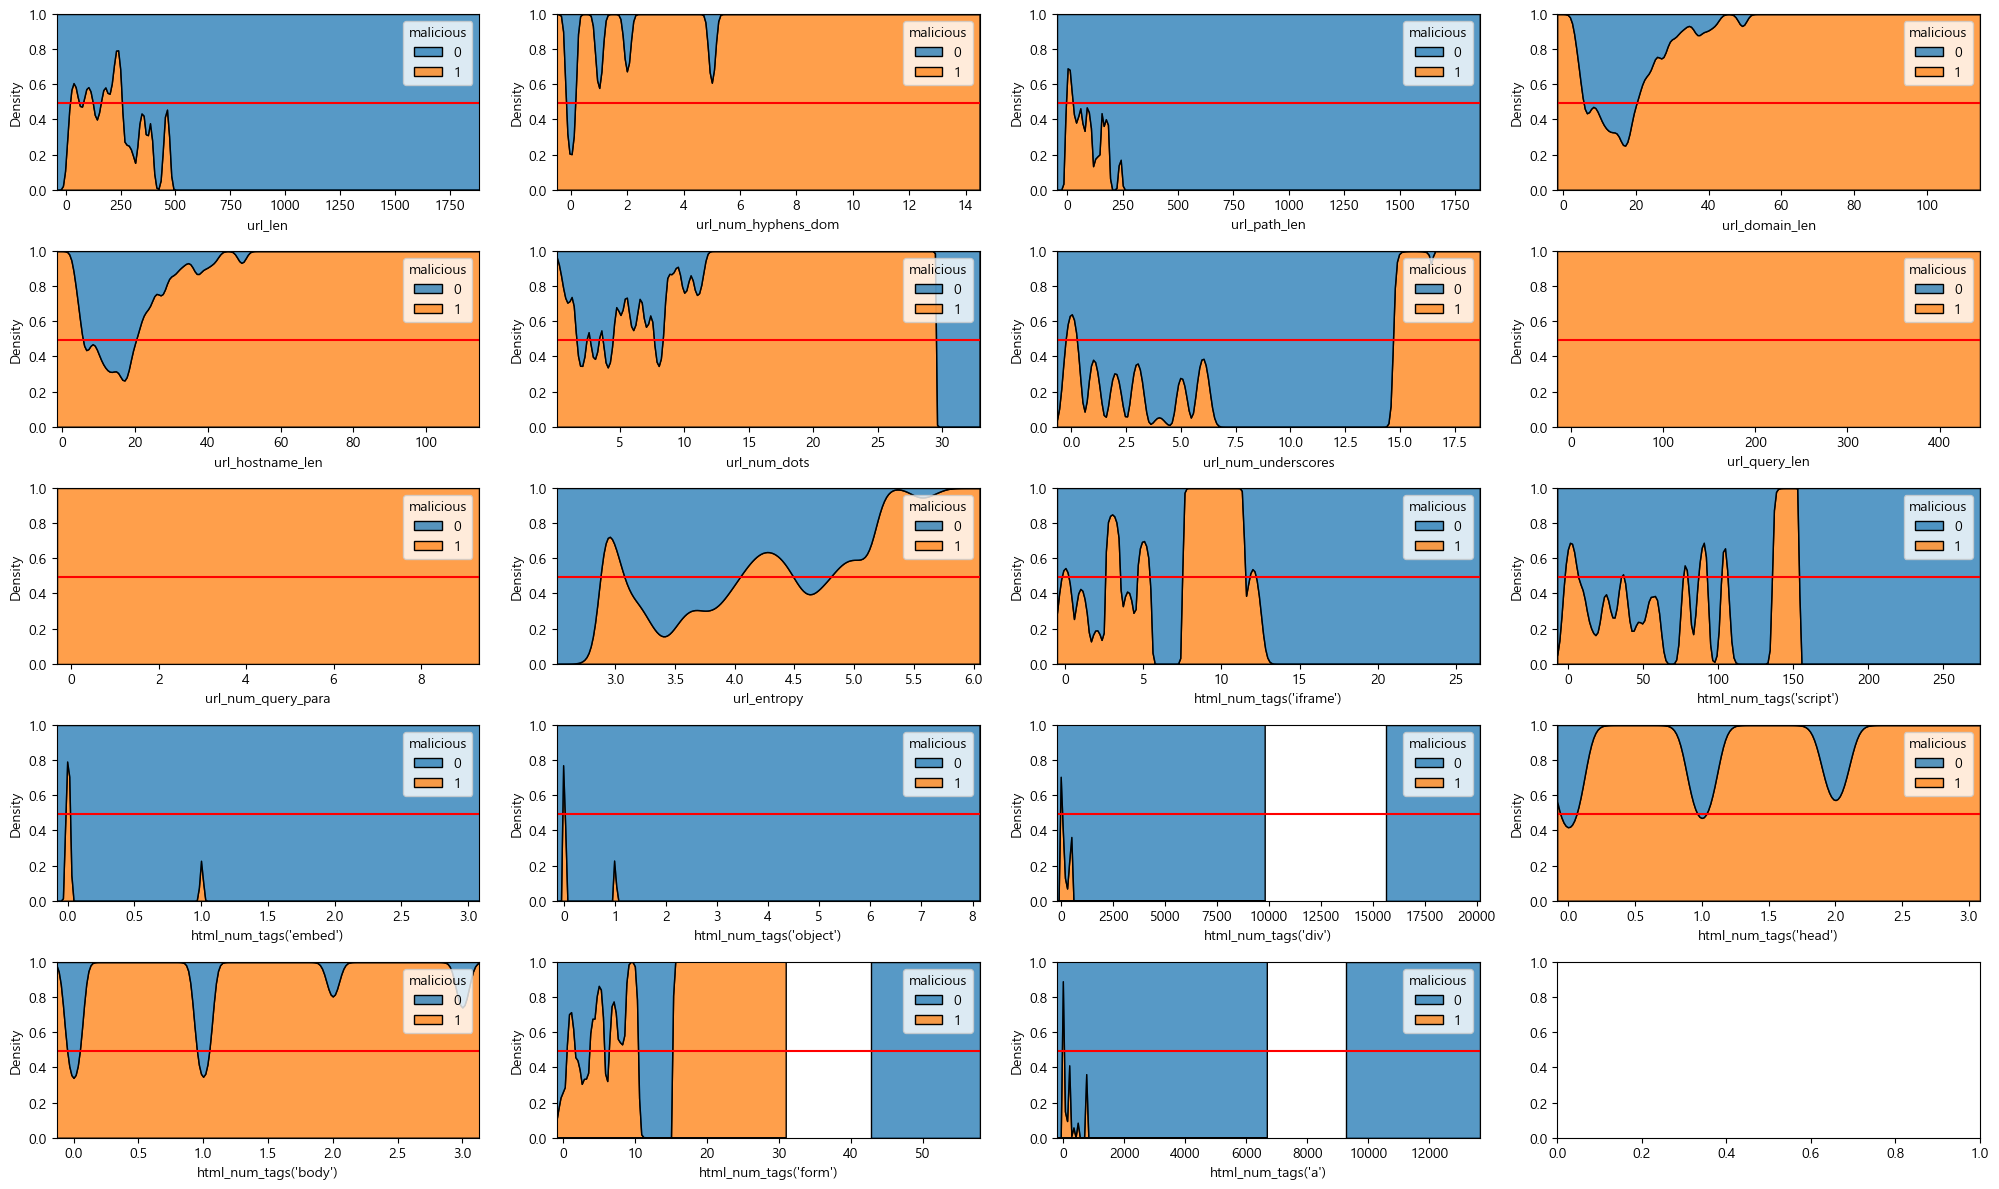

In [36]:
# 이변량 분석 : 숫자 -> 범주
plt.figure(figsize=(20, 12))
for i in range(0, len(n_columns)):
    plt.subplot(5, 4, i + 1)
    sns.kdeplot(x=n_columns[i], data=df, hue='malicious', multiple='fill')
    plt.axhline(df['malicious'].mean(), color='r')
    plt.tight_layout()

plt.show()

In [30]:
# 이변량 분석 : 범주 -> 범주
import scipy.stats as spst

for i in range(0, len(c_columns) - 1):
    print(f'[[[ {c_columns[i]} ]]]')
    
    table = pd.crosstab(df['label'], df[c_columns[i]])
    print(table)
    print()
    
    print(f'카이제곱 통계량 : {spst.chi2_contingency(table)[0]}')
    print(f'p-value : {spst.chi2_contingency(table)[1]}')
    print(f'자유도 : {spst.chi2_contingency(table)[2]}')
    
    print('-'*30)

[[[ url_ip_present ]]]
url_ip_present   0.0  1.0
label                    
benign          1710  148
malicious       1731   75

카이제곱 통계량 : 22.629448734296957
p-value : 1.9645029354744843e-06
자유도 : 1
------------------------------
[[[ url_chinese_present ]]]
url_chinese_present   0.0
label                    
benign               1858
malicious            1806

카이제곱 통계량 : 0.0
p-value : 1.0
자유도 : 0
------------------------------
[[[ url_port ]]]
url_port    0.0  1.0
label               
benign     1853    5
malicious  1803    3

카이제곱 통계량 : 0.0984618258872073
p-value : 0.7536833698526882
자유도 : 1
------------------------------


# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [38]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [39]:
# 중복 데이터 제거를 제거합니다.
del_columns=['url_num_query_para', 'url_hostname_len']
df.drop(del_columns, axis=1, inplace=True)

In [40]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_num_dots             3664 non-null   float64
 5   url_num_underscores      3664 non-null   float64
 6   url_query_len            3664 non-null   float64
 7   url_ip_present           3664 non-null   float64
 8   url_entropy              3664 non-null   float64
 9   url_chinese_present      3664 non-null   float64
 10  url_port                 3664 non-null   float64
 11  html_num_tags('iframe')  3664 non-null   float64
 12  html_num_tags('script')  3664 non-null   float64
 13  html_num_tags('embed')   3664 non-null   float64
 14  html_num_tags('object') 

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [1]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


### <span style="color:darkred">[문제2] series.copy()를 이용하여 'label' column의 데이터를 'label_binary' column으로 복사해보세요.<span>

In [43]:
# series.copy() 로 복사하여 새로운 컬럼을 생성합니다.
lc = pd.Series(df['label'])
df['label_binary'] = lc.copy()
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,url_chinese_present,...,html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,malicious,label_binary
0,23.0,0.0,8.0,15.0,2.0,0.0,0.0,0.0,4.260333,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious,1,malicious
1,75.0,0.0,58.0,17.0,6.0,0.0,0.0,0.0,4.636107,0.0,...,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign,0,benign
2,20.0,0.0,4.0,16.0,2.0,0.0,0.0,0.0,3.708966,0.0,...,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign,0,benign
3,27.0,0.0,13.0,14.0,3.0,0.0,0.0,0.0,4.025592,0.0,...,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign,0,benign
4,39.0,2.0,12.0,27.0,2.0,0.0,0.0,0.0,4.631833,0.0,...,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign,0,benign


### <span style="color:darkred">[문제3] replace() 함수를 활용하여 'label_binary'의 'benign'은 0으로 'malicious'은 1로 변경해주세요. <br><br> 'label'과 데이터를 비교해 보세요.<span>

In [45]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
df['label_binary'].replace({'benign':0, 'malicious':1}, inplace=True)
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,url_chinese_present,...,html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,malicious,label_binary
0,23.0,0.0,8.0,15.0,2.0,0.0,0.0,0.0,4.260333,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious,1,1
1,75.0,0.0,58.0,17.0,6.0,0.0,0.0,0.0,4.636107,0.0,...,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign,0,0
2,20.0,0.0,4.0,16.0,2.0,0.0,0.0,0.0,3.708966,0.0,...,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign,0,0
3,27.0,0.0,13.0,14.0,3.0,0.0,0.0,0.0,4.025592,0.0,...,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign,0,0
4,39.0,2.0,12.0,27.0,2.0,0.0,0.0,0.0,4.631833,0.0,...,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign,0,0


In [46]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
pd.unique(df['label_binary'])

array([1, 0], dtype=int64)

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제4] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [47]:
# 결축치의 존재를 확인합니다.
df.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
malicious                  0
label_binary               0
dtype: int64

In [49]:
# 결측치를 적절히 처리해줍니다.
df['url_path_len'].interpolate(method='linear', inplace=True)
df['url_domain_len'].interpolate(method='linear', inplace=True)

In [50]:
# 결축치의 존재를 확인합니다.
df.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
malicious                  0
label_binary               0
dtype: int64

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제5] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [52]:
df.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_num_dots', 'url_num_underscores', 'url_query_len',
       'url_ip_present', 'url_entropy', 'url_chinese_present', 'url_port',
       'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'label', 'malicious', 'label_binary'],
      dtype='object')

In [54]:
del_columns = ['url_chinese_present', "html_num_tags('applet')", 'malicious', 'label']
df.drop(del_columns, axis=1, inplace=True)
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label_binary
0,23.0,0.0,8.0,15.0,2.0,0.0,0.0,0.0,4.260333,0.0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,6.0,0.0,0.0,0.0,4.636107,0.0,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0
2,20.0,0.0,4.0,16.0,2.0,0.0,0.0,0.0,3.708966,0.0,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0
3,27.0,0.0,13.0,14.0,3.0,0.0,0.0,0.0,4.025592,0.0,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0
4,39.0,2.0,12.0,27.0,2.0,0.0,0.0,0.0,4.631833,0.0,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3664 non-null   float64
 3   url_domain_len           3664 non-null   float64
 4   url_num_dots             3664 non-null   float64
 5   url_num_underscores      3664 non-null   float64
 6   url_query_len            3664 non-null   float64
 7   url_ip_present           3664 non-null   float64
 8   url_entropy              3664 non-null   float64
 9   url_port                 3664 non-null   float64
 10  html_num_tags('iframe')  3664 non-null   float64
 11  html_num_tags('script')  3664 non-null   float64
 12  html_num_tags('embed')   3664 non-null   float64
 13  html_num_tags('object')  3664 non-null   float64
 14  html_num_tags('div')    

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제6] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [57]:
target = 'label_binary'
x = df.drop(target, axis=1)
y = df.loc[:, target]

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [61]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2931, 19), (733, 19), (2931,), (733,))